## Analisis exploratorio de Datos (EDA)

In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Congirugamos el estilo de seaborn
sns.set(style="darkgrid", font_scale=1.2, rc={"figure.figsize":(8,4)})
import requests

### `KPI 1`: Acceso a Internet en relación con cada 100 hogares por trimestres.

In [6]:
# Cargo los datos
df_accesos100h = pd.read_excel('dataset/Internet_Penetracion.xlsx')
df_accesos100h.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [7]:
# Descripción general de los datos
df_accesos100h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [8]:
# Resumen estadístico de las columnas numéricas
df_accesos100h.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620138
std,2.583484,1.118682,23.319298
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.216632
50%,2018.000000,2.500000,46.386588
75%,2020.000000,3.250000,62.442698
max,2022.000000,4.000000,124.061394


Como primer análisis, se observa que la penetración de Internet en la región es del 49%, lo que sugiere que alrededor de la mitad de los hogares en el área geográfica tienen acceso a Internet. La alta desviación estándar (std) señala que existe una considerable variabilidad en el número de conexiones a Internet por hogar en la misma área geográfica.

El valor `mínimo` de 9.34 indica que la gran mayoría de los hogares en el área geográfica tienen acceso a Internet. Esto sugiere que la exclusión digital es poco común en esta región.

El valor `máximo` de 124.06 señala que algunos hogares en el área geográfica disfrutan de un acceso excepcionalmente alto a Internet. Este fenómeno podría ser el resultado de factores como una infraestructura de Internet más avanzada o la presencia de proveedores de alta velocidad.

`El percentil 25` revela que el 25% de los hogares tienen un acceso a Internet por debajo de 32.21, lo que indica que un cuarto de los hogares en el área geográfica tienen un acceso relativamente limitado. Este hallazgo puede estar relacionado con cuestiones geográficas o económicas que limitan la conectividad.

`El percentil 50` revela que el 50% de los hogares tienen un acceso a Internet por debajo de 46.38, lo que indica que en la mitad de los hogares en el área geográfica tienen un acceso relativamente limitado. Este hallazgo puede estar relacionado con cuestiones geográficas o económicas e incluso tecnologicas que limitan la conectividad.

`El percentil 75` muestra que el 75% de los hogares tienen un acceso a Internet por debajo de 62.44, lo que significa que la mayoría de los hogares en la región tienen un acceso moderado a Internet. Esto sugiere que hay margen para mejorar el acceso a Internet para los hogares que se encuentran por debajo de este percentil, lo que podría impulsar una mayor equidad en el acceso a la conectividad.

En `resumen`, se observa un aumento de los accesos a internet por cada 100 hogares en Argentina a lo largo de los años. La desviación estándar también aumentó, lo que indica que la distribución de los valores se hizo más dispersa.

In [29]:
# Resumen estadístico de las columnas categoricas
df_accesos100h.describe(exclude='number')

,Provincia
count,864
unique,24
top,Buenos Aires
freq,36


In [30]:
# Buscamos duplicados
colums = df_accesos100h.columns
n_duplicados = df_accesos100h.drop(labels=colums,axis=1).duplicated().sum()
n_duplicados

0

Se comprobó ausencia de nulos y duplicados en los datos, lo que implica que no hay información redundante en el conjunto de datos.

Se preocede a crear el `KPI 1`

In [33]:
# Seleccionar los datos correspondientes al trimestre más reciente y calcular la media de la cantidad de accesos por cada 100 hogares.
trimestre2_2022 = df_accesos100h[(df_accesos100h['Año'] == 2022) & (df_accesos100h['Trimestre'] == 2)]

# Determinar la cantidad de hogares adicionales requeridos en cada provincia para lograr un aumento del 2%
# en la tasa de acceso al servicio de Internet.
hogares_adicionales = trimestre2_2022['Accesos por cada 100 hogares'] * 0.02

# Agregar la cantidad de hogares adicionales a los accesos actuales para alcanzar la meta de acceso al servicio de Internet para el tercer trimestre de 2022.
objetivo = trimestre2_2022['Accesos por cada 100 hogares'] + hogares_adicionales
objetivo = objetivo.round(2)

# Incorpora la columna de Provincia a la lista de columnas que se mostrarán
columnas = ['Provincia', 'Accesos por cada 100 hogares', 'Objetivo para T3 2022']

# Genera un nuevo DataFrame con la información requerida.
df_obj_t3_2022 = pd.DataFrame({
    'Provincia': trimestre2_2022['Provincia'],
    'Accesos por cada 100 hogares': trimestre2_2022['Accesos por cada 100 hogares'],
    'Objetivo para T3 2022': objetivo
})

print(df_obj_t3_2022[columnas])

              Provincia  Accesos por cada 100 hogares  Objetivo para T3 2022
48         Buenos Aires                         77.58                  79.13
49      Capital Federal                        121.31                 123.74
50            Catamarca                         62.40                  63.65
51                Chaco                         43.79                  44.67
52               Chubut                         83.19                  84.85
53              Córdoba                         87.48                  89.23
54           Corrientes                         48.35                  49.32
55           Entre Ríos                         63.90                  65.18
56              Formosa                         43.42                  44.29
57                Jujuy                         57.32                  58.47
58             La Pampa                         92.98                  94.84
59             La Rioja                         80.14                  81.74

`Visualizaciones de datos`

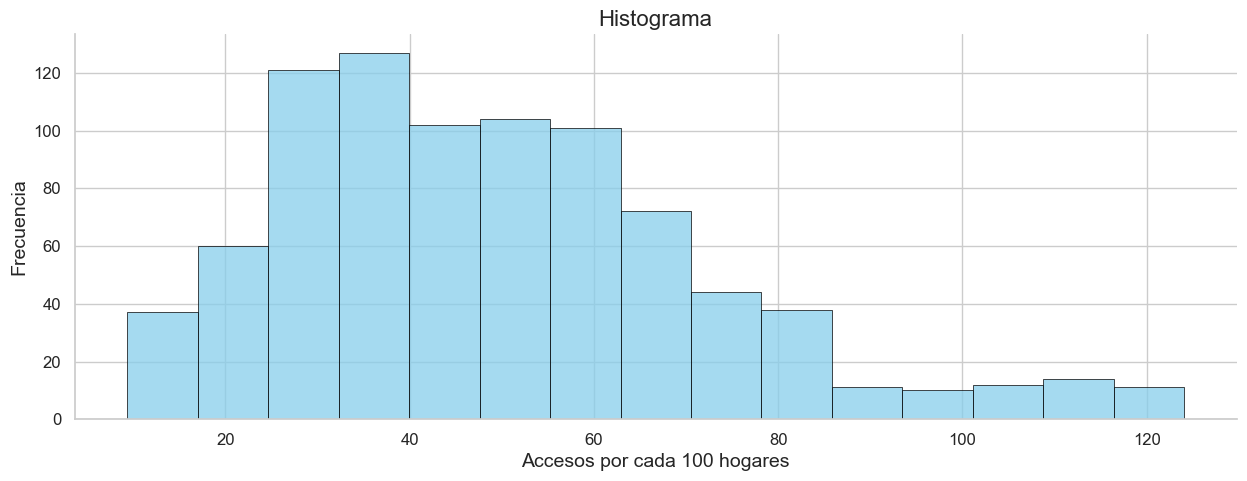

In [32]:
# Se imprimen gráficas para visualizar distribución de los datos.

# Histograma de una variable numérica
plt.figure(figsize=(15,5))
sns.histplot(df_accesos100h["Accesos por cada 100 hogares"], bins=15, edgecolor='black', linewidth=0.5, color = "skyblue")
plt.title("Histograma", fontsize=16)
plt.xlabel("Accesos por cada 100 hogares", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

#Mostrar el gráfico
plt.show()

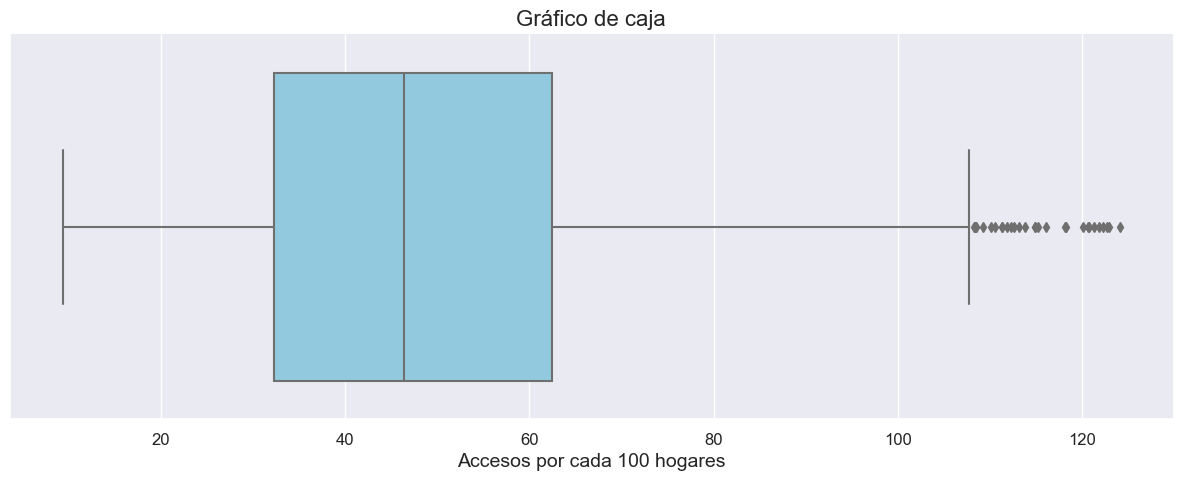

In [23]:
# Gráfico de caja de una variable numérica
plt.figure(figsize=(15,5))
sns.boxplot(x=df_accesos100h["Accesos por cada 100 hogares"], color="skyblue")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("Accesos por cada 100 hogares", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

`Conclusión:` Ambas graficas reflejan valores atípicos en la variable 'Acceso por cada 100 hogares' Se decide mantener los valores para no afectar el análisis

Genero algunas visualizaciones para obtener una comprensión de cómo se distribuyen los datos en relación a lo que estoy investigando.

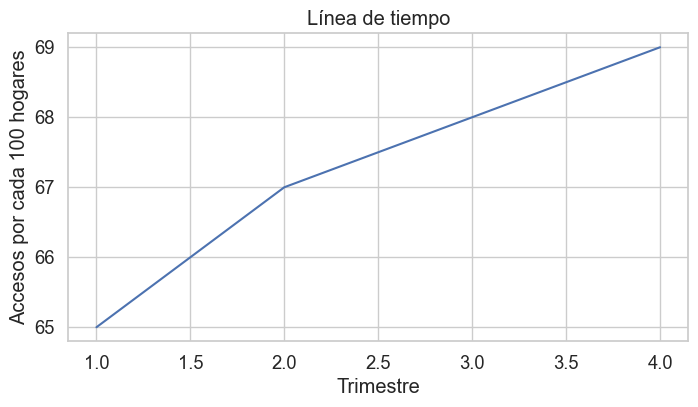

In [28]:
# Hacemos una query para graficar la media de los accesos por cada 100 hogares, agrupado por año
graf1 = df_accesos100h[["Año","Trimestre","Accesos por cada 100 hogares"]].groupby(["Año","Trimestre"]).mean().reset_index().sort_values(by="Accesos por cada 100 hogares",ascending=False)
graf1 = graf1[graf1["Año"] == 2022]
graf1["Accesos por cada 100 hogares"] = graf1["Accesos por cada 100 hogares"].astype(int)

# Luego la graficamos en una linea de tiempo
fig, ax = plt.subplots(figsize=(8, 4)) 
sns.lineplot(x="Trimestre", y="Accesos por cada 100 hogares", data=graf1, ax=ax) 

# Añadimos etiquetas y titulo
ax.set_xlabel('Trimestre')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Línea de tiempo')

# Mostrar el gráfico
plt.show()

Según la información presentada en la gráfica de línea de tiempo, se observa claramente un aumento en la variable 'Accesos por cada 100 hogares' a medida que transcurre el tiempo. Esta tendencia al alza sugiere un crecimiento sostenido en la penetración de Internet en el área geográfica analizada.

Este incremento en el acceso a Internet a lo largo de los trimestres podría deberse a una serie de factores. Entre ellos, destacan la posible reducción de los costos de acceso a Internet, la mayor disponibilidad de dispositivos móviles, y la expansión de las redes de banda ancha en la región. Estos factores pueden estar contribuyendo al aumento de la conectividad de los hogares en el área geográfica, lo que a su vez tiene implicaciones positivas para el acceso a la información y las oportunidades en la comunidad

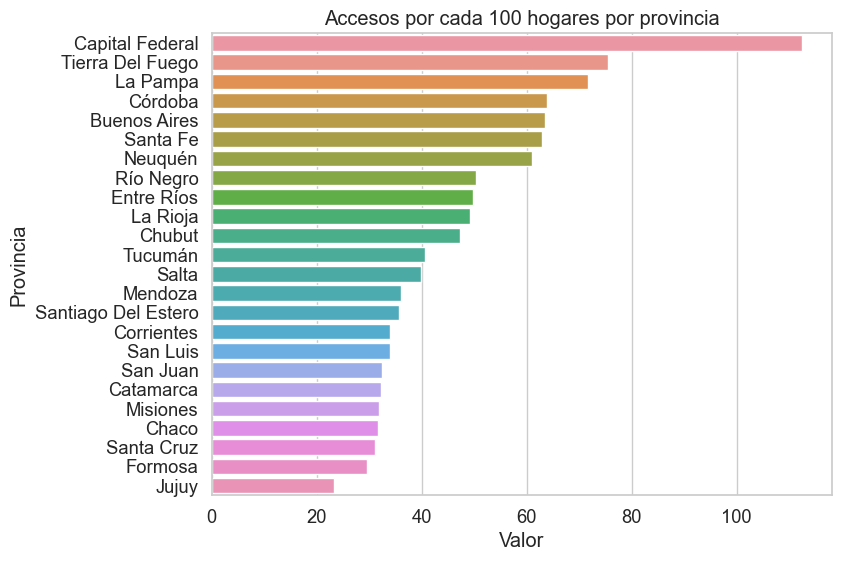

In [27]:
# Hacemos una query para ver ordenado por provincia los accesos utilizando la mediana
graf_prov = df_accesos100h[["Provincia","Accesos por cada 100 hogares"]].groupby("Provincia").median().reset_index().sort_values(by="Accesos por cada 100 hogares",ascending=False)

# Configurar el estilo de la gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})

# Creamos un grafico de barras horizontal
ax = sns.barplot(x='Accesos por cada 100 hogares', y='Provincia', data=graf_prov)

# Añadimos las etiquetas y el título
ax.set_xlabel('Valor')
ax.set_ylabel('Provincia')
ax.set_title('Accesos por cada 100 hogares por provincia')

# Mostrar el gráfico
plt.show()

La gráfica resalta la marcada heterogeneidad en el acceso a Internet en las provincias de Argentina. Capital Federal y algunas otras provincias las cuales presentan una alta penetración de Internet, lo que puede reflejar un mayor desarrollo tecnológico y una mejor infraestructura de telecomunicaciones. Por otro lado, provincias como Santa Cruz, Formosa y Jujuy muestran un acceso más limitado, lo que podría deberse a desafíos geográficos, económicos o de infraestructura.

In [34]:
df_accesos100h.to_csv('./KPI1_acceso_cd100h.csv', index=False)

### `KPI2 - Velocidad media de bajada por provincia`

`Carga de datos y Exploración Inicial` Se cargan los datos y se realiza una exploración inicial de los datos para comprender su estructura y contenido.

In [57]:
# Nuevamente, importo el último dataframe que necesito y reitero el proceso
df_velp = pd.read_excel('dataset/Internet_Accesos-por-velocidad.xlsx')
df_velp.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026,168759.0


In [58]:
# Descripción general de los datos
df_velp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                864 non-null    int64  
 11  Total                864 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 81.1+ KB


In [59]:
df_velp.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,864.000000,8.640000e+02
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5252.479167,3.474059e+05
std,2.583484,1.118682,13459.419708,21992.818620,3.438435e+05,65383.130836,93024.185664,73859.534388,3.635417e+05,12973.667653,7.450600e+05
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.000000,5.274050e+04
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.000000,1.052355e+05
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5068.000000,1.791482e+05
max,2022.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.000000,4.794665e+06


In [73]:
# Reempazamos por 0 los espacios vacíos
df_velp.replace('', "0", inplace=True)
df_velp.dropna(inplace=True)

In [78]:
df_velp.info()

# Colocaremos el tipo de dato correcto para realizar observaciones
data_ok = ["HASTA 512 kbps","+ 512 Kbps - 1 Mbps","+ 1 Mbps - 6 Mbps","+ 6 Mbps - 10 Mbps","+ 10 Mbps - 20 Mbps","+ 20 Mbps - 30 Mbps","+ 30 Mbps","Total"]

# Convertir las columnas al tipo de datos de cadena (string)
for elemento in data_ok:
    df_velp[elemento] = df_velp[elemento].astype(str).replace(",","")

# Luego, se convierten las columnas al tipo de datos int.
try:
    for elemento in data_ok:
        df_velp[elemento] = np.round(df_velp[elemento].astype(float)).astype(int)        
except (ValueError, TypeError):
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  864 non-null    int64 
 1   Trimestre            864 non-null    int64 
 2   Provincia            864 non-null    object
 3   HASTA 512 kbps       864 non-null    int32 
 4   + 512 Kbps - 1 Mbps  864 non-null    int32 
 5   + 1 Mbps - 6 Mbps    864 non-null    int32 
 6   + 6 Mbps - 10 Mbps   864 non-null    int32 
 7   + 10 Mbps - 20 Mbps  864 non-null    int32 
 8   + 20 Mbps - 30 Mbps  864 non-null    int32 
 9   + 30 Mbps            864 non-null    int32 
 10  OTROS                864 non-null    int64 
 11  Total                864 non-null    int32 
dtypes: int32(8), int64(3), object(1)
memory usage: 54.1+ KB


In [80]:
# Observamos los cambios
df_velp.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934,23347,259866,28155,244555,9867,3760109,97634,4794665
1,2022,4,Capital Federal,516,5096,3132,64653,36336,8116,1299117,106772,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,2280,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,3909,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,1577,19048,20026,168759


In [81]:
# Sumamos todas las columnas agrupando por provincia
df_filtrado = df_velp[["Año","Provincia","HASTA 512 kbps","+ 512 Kbps - 1 Mbps","+ 1 Mbps - 6 Mbps","+ 6 Mbps - 10 Mbps","+ 10 Mbps - 20 Mbps","+ 20 Mbps - 30 Mbps","+ 30 Mbps","OTROS","Total"]].groupby(["Año","Provincia"]).sum().reset_index()
df_filtrado

,Año,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2014,Buenos Aires,30952,594642,9100616,622326,268741,1730,17984,0,10636993
1,2014,Capital Federal,4481,311169,3286232,383273,261481,1099,27258,0,5262192
2,2014,Catamarca,78,34883,30599,5793,707,0,1,0,76876
3,2014,Chaco,1731,58271,129062,23398,3126,139,2,0,138833
4,2014,Chubut,13387,19082,244360,41,0,0,0,0,276942
...,...,...,...,...,...,...,...,...,...,...,...
211,2022,Santa Cruz,206,21261,37577,45693,45914,10651,16306,2824,153441
212,2022,Santa Fe,1872,44698,530806,630772,303162,196486,1257735,74577,2725810
213,2022,Santiago Del Estero,712,5453,87143,183166,61970,2484,45668,3365,473031
214,2022,Tierra Del Fuego,90,3458,48552,44841,79469,8843,4821,11387,117410


Se busca determinar que velocidad es la que tiene mas porcentaje según provincia y año

In [82]:
# Sacamos el porcentaje del total
for elemento in data_ok: 
    df_filtrado[elemento] = (df_filtrado[elemento]/df_filtrado["Total"]) 
    df_filtrado[elemento] = df_filtrado[elemento].astype(str)
    df_filtrado[elemento] = df_filtrado[elemento].str.replace(".",",",regex=False)
df_filtrado

,Año,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2014,Buenos Aires,"0,002909844915757677","0,05590320497531586","0,8555628456275189","0,05850582020689494","0,02526475292406416","0,0001626399490908756","0,001690703378294975",0,"1,0"
1,2014,Capital Federal,"0,0008515462757725298","0,05913296208120114","0,6244986879992216","0,07283523672264335","0,049690509202248795","0,00020884832784512613","0,005179970628209689",0,"1,0"
2,2014,Catamarca,"0,0010146209480201883","0,4537566990998491","0,39803059472397107","0,07535511733180707","0,009196628336541965","0,0","1,3007960872053696e-05",0,"1,0"
3,2014,Chaco,"0,012468217210605547","0,41972009536637545","0,9296204792808627","0,16853341784734177","0,0225162605432426","0,001001202884040538","1,440579689266961e-05",0,"1,0"
4,2014,Chubut,"0,04833864130395534","0,0689025138837735","0,8823508171386066","0,0001480454391172159","0,0","0,0","0,0",0,"1,0"
...,...,...,...,...,...,...,...,...,...,...,...
211,2022,Santa Cruz,"0,001342535567416792","0,13856140145072046","0,2448954321204893","0,2977887266115315","0,29922901962317766","0,06941430256580705","0,10626885904028259",2824,"1,0"
212,2022,Santa Fe,"0,0006867683367512776","0,01639806149364776","0,19473330863119587","0,23140717804982738","0,11121905048407629","0,07208352746523052","0,46141697330334835",74577,"1,0"
213,2022,Santiago Del Estero,"0,0015051867636581959","0,011527785705376603","0,18422259851891315","0,38721775105648465","0,13100621312345279","0,005251241461976065","0,09654335550946978",3365,"1,0"
214,2022,Tierra Del Fuego,"0,0007665445873434972","0,02945234647815348","0,41352525338557194","0,38191806490077507","0,6768503534622264","0,07531726428753939","0,04106123839536666",11387,"1,0"


Se procede a analizar las velocidades de acuerdo a cada año para determinar la calidad del servicio

In [95]:
# Velocidades según el año
datos = df_velp.groupby("Año").sum(numeric_only=True).sort_values(by= "Total",ascending = False)

# Convertimos a % 
for elemento in data_ok : 
    datos[elemento] = (datos[elemento]/datos["Total"]) * 100

datos

,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
Año,,,,,,,,,,
2022,240,0.322725,0.894267,10.768788,9.460252,7.790233,3.810588,61.339463,1293244,100.0
2021,240,0.434960,0.413500,20.510714,10.898554,7.783814,6.093292,52.051253,711686,100.0
2020,240,0.472087,0.546057,28.773408,10.869766,8.424017,5.431246,44.676305,775099,100.0
2019,240,1.328690,1.129811,37.913709,11.361841,12.719614,12.381796,24.462878,819066,100.0
2016,240,0.396730,4.470045,69.044868,10.982232,11.531807,1.215215,0.443748,0,100.0
2015,240,0.570532,6.773326,76.218949,9.868119,7.371761,0.175510,0.242658,0,100.0
2017,240,0.272877,3.354720,61.406408,13.330587,17.057506,4.312240,2.363401,155145,100.0
2018,240,0.604659,3.289318,49.522328,13.810289,23.952178,18.640172,6.907834,783902,100.0
2014,240,0.619316,9.866134,76.630430,6.067667,2.847053,0.022913,0.208255,0,100.0


In [105]:
df_velp.to_csv('./KPI2_accesos_xvelocidad.csv', index=False)